**Data Info**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholder(customers) from past year will aslo be interested in Vehicle Insurance provided by the company.



---
An Insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss,damage,illness,or death in return for the payment of a specified premium.



* A premium is a sum of money that the customer needs to pay regularly to an insurance comapny for this guarantee.
* For exapmle, you may pay a premium of Rs.5000 each year for a health insurance cover of Rs.200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that, the insurance provider company will bear the cost of hospitalised etc. for upto Rs.200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs.5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.




**Business Problem**


* Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider comapny so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called 'sum assured') to the customer.



**Our Task:**



* Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then according plan its communication strategy to reach out to those customer and optimise its business model and revenue
* Now, in order to predict, whether the customer would be interested in Vehicle Insurance, you have information about demographics (gender, age, region code type), Vehicle(Vehicle Age, Damage), Policy (Premium, sourcing channel)etc





**Project Start Here:**

In [4]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Step 2: Load and Inspect the Dataset
df = pd.read_csv('data.csv')
print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())

Dataset Shape: (381109, 12)
First 5 rows:
    id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2      

In [7]:
# Step 3: Data Preprocessing
# Check for null values and dataset information
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())
print("\nMissing Values in Dataset:\n")
print(df.isnull().sum())
print("\nDuplicate Values in Dataset:\n")
print(df.duplicated().sum())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None

Summary Statistics:

                  id            Age  Driving_License   

In [8]:
# Encode Categorical Features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])

In [9]:
# Drop ID column (irrelevant for prediction)
df = df.drop(columns=['id'])

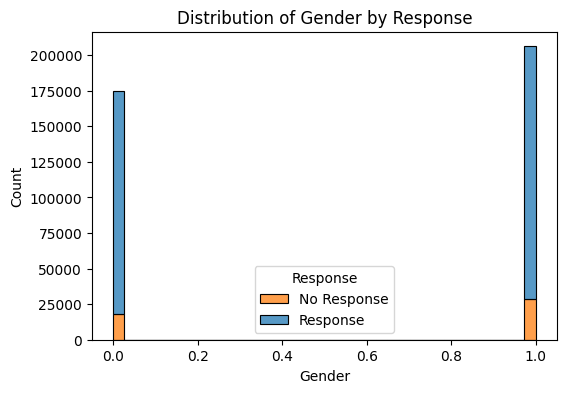

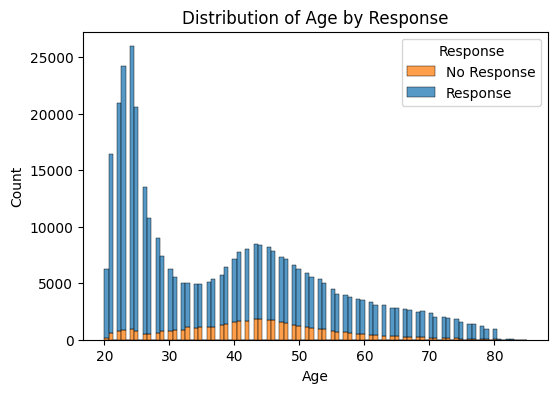

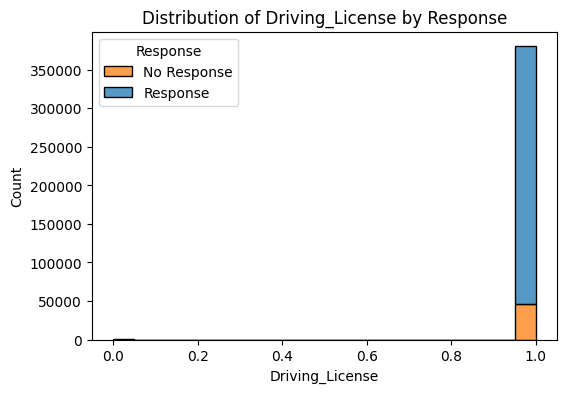

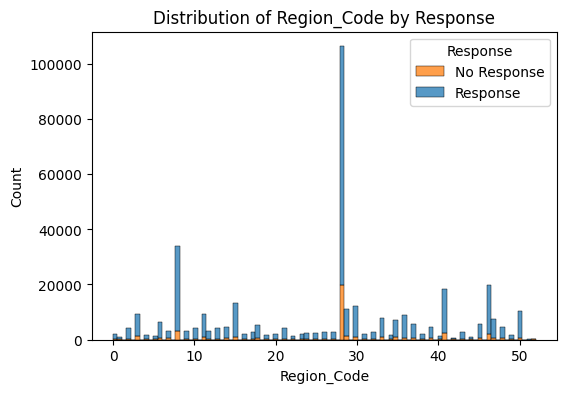

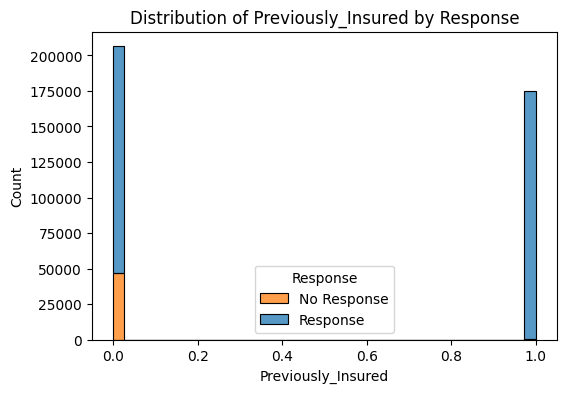

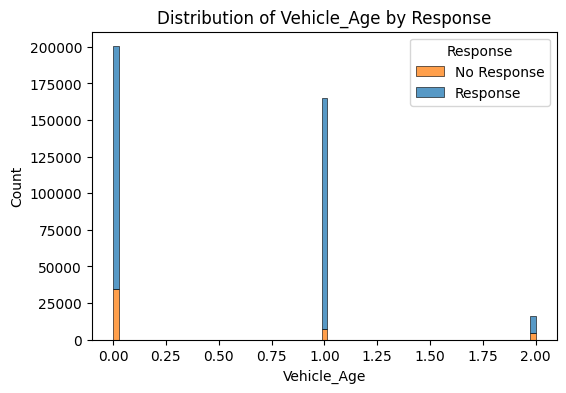

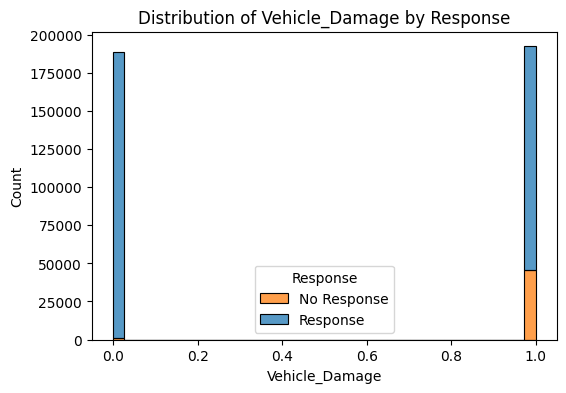

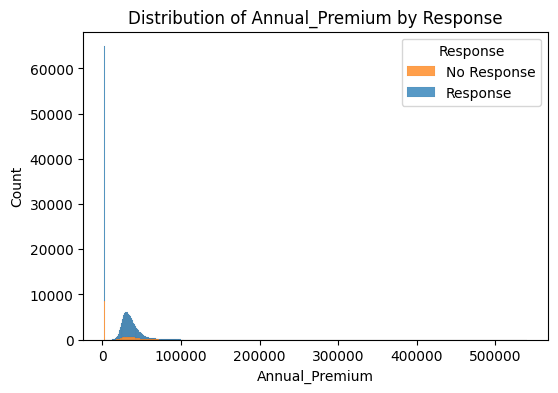

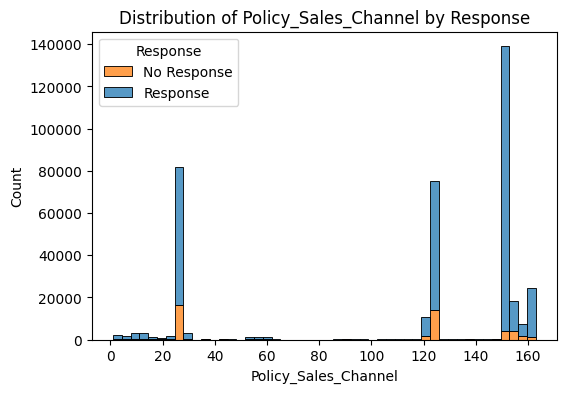

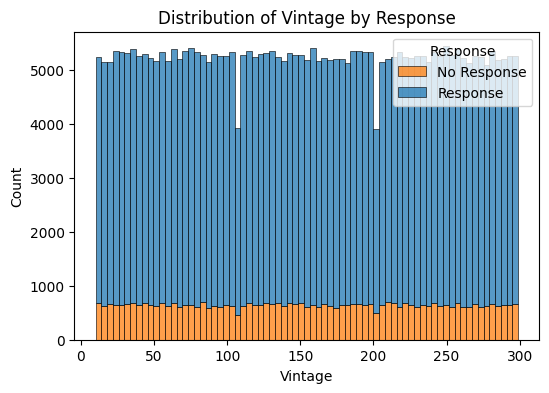

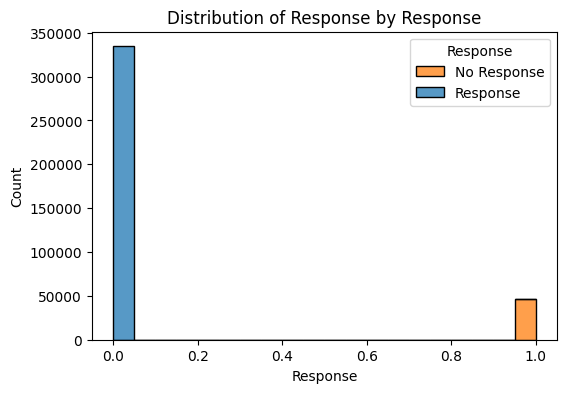

In [10]:
# Step 4: Visualization of Features with Target Column
for column in df.columns:
    # if column != 'Response':
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, hue='Response', multiple='stack', kde=False)
    plt.title(f"Distribution of {column} by Response")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title='Response', labels=['No Response', 'Response'])
    plt.show()


In [11]:
# Step 5: Define Features and Target
X = df.drop(columns=['Response'])  # Features
y = df['Response']  # Target

In [12]:
# Step 6: Handle Imbalanced Target using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

c:\Users\Avinash Gupta\Desktop\Insurance Prediction Project\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Avinash Gupta\Desktop\Insurance Prediction Project\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [13]:
# Step 7: Split the Resampled Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
# Step 8: Feature Scaling (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Step 9: Build and Train Models with Hyperparameter Tuning
# Define Models
logistic_model = LogisticRegression(random_state=42,class_weight='balanced', verbose=1)
rf_model = RandomForestClassifier(random_state=42)

In [16]:
# Hyperparameter Grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

In [17]:
print("\nRandom Forest:")
# Random Forest Accuracy
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Train Accuracy (Random Forest): {train_accuracy_rf:.2f}")
print(f"Test Accuracy (Random Forest): {test_accuracy_rf:.2f}")


Random Forest:
Train Accuracy (Random Forest): 1.00
Test Accuracy (Random Forest): 0.89


In [18]:
# Hyperparameter Grid for Logistic Regression
logistic_param_grid = {
    # 'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 1000, 15000],
    'solver': ['liblinear']
}

In [19]:
# Logistic Regression Accuracy
print("Logistic Regression:")
logistic_model.fit(X_train, y_train)
y_train_pred_lr = logistic_model.predict(X_train)
y_test_pred_lr = logistic_model.predict(X_test)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print(f"Train Accuracy (Logistic Regression): {train_accuracy_lr:.2f}")
print(f"Test Accuracy (Logistic Regression): {test_accuracy_lr:.2f}")

Logistic Regression:
Train Accuracy (Logistic Regression): 0.63
Test Accuracy (Logistic Regression): 0.63


c:\Users\Avinash Gupta\Desktop\Insurance Prediction Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Grid Search for Random Forest
grid_rf = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='f1', verbose=1)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [21]:
# Grid Search for Logistic Regression
grid_logistic = GridSearchCV(logistic_model, logistic_param_grid, cv=3, scoring='f1', verbose=1)
grid_logistic.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42, verbose=1),
             param_grid={'max_iter': [500, 1000, 15000],
                         'solver': ['liblinear']},
             scoring='f1', verbose=1)

In [22]:
# Step 10: Evaluate Models
# Predictions
rf_preds = grid_rf.best_estimator_.predict(X_test)
logistic_preds = grid_logistic.best_estimator_.predict(X_test_scaled)

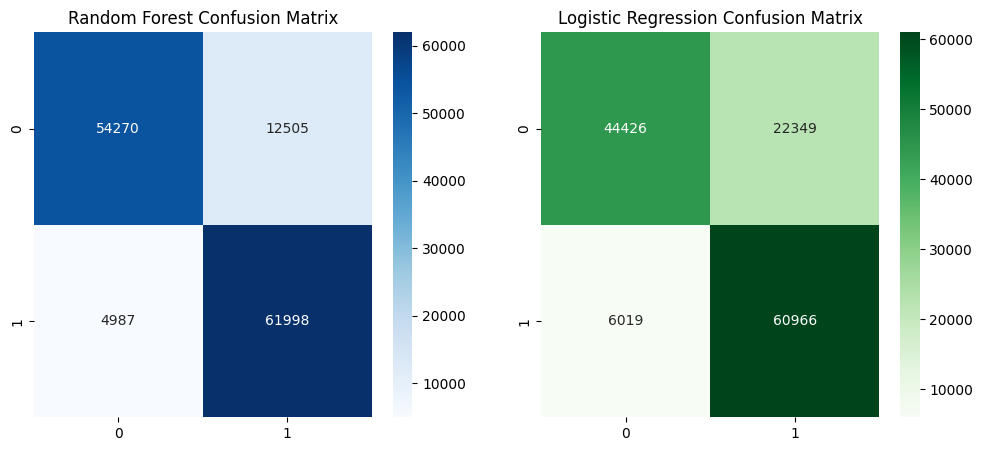

In [23]:
# Step 11: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, logistic_preds), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
plt.show()

In [24]:
# Print Classification Reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     66775
           1       0.83      0.93      0.88     66985

    accuracy                           0.87    133760
   macro avg       0.87      0.87      0.87    133760
weighted avg       0.87      0.87      0.87    133760

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     66775
           1       0.73      0.91      0.81     66985

    accuracy                           0.79    133760
   macro avg       0.81      0.79      0.78    133760
weighted avg       0.81      0.79      0.78    133760



In [25]:
# Calculate and Print Accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
logistic_accuracy = accuracy_score(y_test, logistic_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

Random Forest Accuracy: 0.8692
Logistic Regression Accuracy: 0.7879


In [26]:
# Step 12: Print Best Parameters for Random Forest and Logistic Regression
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Parameters for Logistic Regression:", grid_logistic.best_params_)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Parameters for Logistic Regression: {'max_iter': 500, 'solver': 'liblinear'}


**End Here**